<a href="https://colab.research.google.com/github/cadyngo/EAS-Math-for-AI/blob/main/07_Intro_Prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Probability for Machine Learning  



Welcome to this interactive Colab notebook designed for incoming Caltech graduate students.

This notebook is a hands-on introduction to key concepts in **probability theory**, with connections to:
- **Machine Learning**
- **Data Science**
- **Statistical Thinking**

Each section includes:
- Clear conceptual overviews
- Live code demonstrations
- Exercises to explore and modify

By the end, you'll be familiar with essential probabilistic tools and how they apply to machine learning pipelines, inference, and uncertainty quantification.

In [ ]:
# Essential imports for visualization and simulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets  # For interactive demos

sns.set(style="whitegrid")  # Use Seaborn style for plots
np.random.seed(42)  # Ensure reproducibility

# Law of Large Numbers (LLN)



##Coin Flip Warm-up

The Law of Large Numbers (LLN) states that if you take the average of more and more i.i.d. random variables with a finite mean μ, the sample mean will tend to get closer to μ.

We'll start with a Bernoulli(p=0.5) coin flip:
- Outcome = 1 (heads) or 0 (tails)
- True mean = 0.5

We'll look at how the proportion of heads stabilizes as the number of coin flips increases:

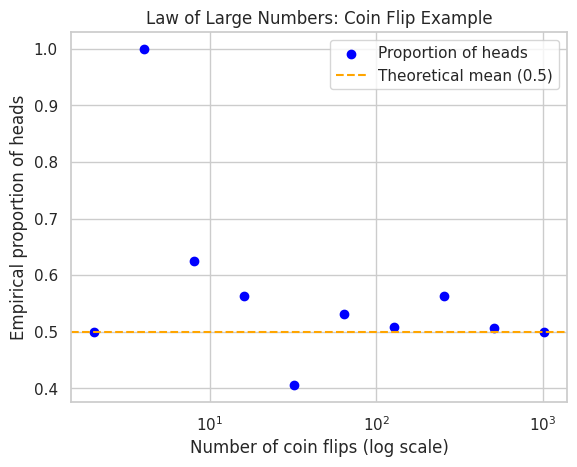

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set reproducibility
np.random.seed(42)

def coin_flip_lln_demo():
    ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
    heads = [np.random.binomial(n, 0.5) for n in ns]
    prop = np.array(heads) / ns

    plt.figure()
    plt.scatter(ns, prop, color="blue", label="Proportion of heads")
    plt.axhline(0.5, color="orange", linestyle="--", label="Theoretical mean (0.5)")
    plt.xscale("log")
    plt.xlabel("Number of coin flips (log scale)")
    plt.ylabel("Empirical proportion of heads")
    plt.title("Law of Large Numbers: Coin Flip Example")
    plt.legend()
    plt.show()

coin_flip_lln_demo()

1. Run the code above multiple times. Do you always get the same curve? Why or why not?
2. Around which value of `n` does the sample proportion become visually close to 0.5?
3. What do you expect would happen if you increased the maximum number of flips to 10,000?


## LLN for Any Distribution with Finite Mean

The Law of Large Numbers (LLN) applies to any distribution with a finite expected value (mean). Formally:

Let X₁, X₂, ..., Xₙ be independent and identically distributed (i.i.d.) random variables with finite mean μ. Then:

\[
\frac{1}{n} \sum_{i=1}^n X_i \rightarrow \mu \quad \text{(as n → ∞)}
\]

This means the sample average stabilizes around the true mean as you collect more samples.

We'll now visualize this for different distributions:
- Bernoulli
- Uniform
- Exponential
- Normal
- Heavy-tailed (Pareto)


In [ ]:
# Define sampling function for multiple distributions
def sample_distribution(dist_name, n):
    """
    Draw n samples from a distribution and return:
    - samples
    - theoretical mean
    - plain-English description
    """
    if dist_name == "Bernoulli(p=0.5)":
        samples = np.random.binomial(1, 0.5, size=n)
        mean = 0.5
        desc = "Takes value 1 with p=0.5, 0 otherwise"
    elif dist_name == "Uniform(0,1)":
        samples = np.random.uniform(0.0, 1.0, size=n)
        mean = 0.5
        desc = "Equal probability between 0 and 1"
    elif dist_name == "Exponential(λ=1)":
        samples = np.random.exponential(scale=1.0, size=n)
        mean = 1.0
        desc = "Time between Poisson(λ=1) events"
    elif dist_name == "Normal(0,1)":
        samples = np.random.normal(0, 1, size=n)
        mean = 0.0
        desc = "Symmetric bell curve, variance = 1"
    elif dist_name == "Normal(0,4) (high variance)":
        samples = np.random.normal(0, 2.0, size=n)  # std dev = 2 → variance = 4
        mean = 0.0
        desc = "Same mean as N(0,1), but more spread"
    elif dist_name == "Pareto(α=0.5)":
        samples = np.random.pareto(0.5, size=n)
        mean = np.inf
        desc = "Heavy-tailed; mean is infinite"
    elif dist_name == "Pareto(α=1.5)":
        samples = 1 + np.random.pareto(1.5, size=n)
        mean = 1.5 / 0.5  # For xm=1
        desc = "Heavy-tailed; mean exists but variance is huge"
    else:
        raise ValueError(f"Unknown distribution: {dist_name}")

    return samples, mean, desc

# List of available distributions for dropdown
available_distributions = [
    "Bernoulli(p=0.5)",
    "Uniform(0,1)",
    "Exponential(λ=1)",
    "Normal(0,1)",
    "Normal(0,4) (high variance)",
    "Pareto(α=0.5)",
    "Pareto(α=1.5)",
]

In [ ]:
from ipywidgets import interact, IntSlider, Dropdown
import matplotlib.pyplot as plt
import numpy as np

def lln_core_demo(dist_name="Bernoulli(p=0.5)", n_max=500, num_paths=5, num_experiments=200):
    n_max = int(n_max)
    num_paths = int(num_paths)
    num_experiments = int(num_experiments)
    x_axis = np.arange(1, n_max + 1)

    plt.figure(figsize=(12, 4))

    # Plot 1: Running average of a few individual sample paths
    plt.subplot(1, 2, 1)
    for _ in range(num_paths):
        samples, mean, _ = sample_distribution(dist_name, n_max)
        running_avg = np.cumsum(samples) / x_axis
        plt.plot(x_axis, running_avg, alpha=0.7)

    if np.isfinite(mean):
        plt.axhline(mean, linestyle="--", color="black")
        plt.text(n_max * 1.02, mean, "theoretical mean", va="center")

    plt.xlabel("n (number of samples)")
    plt.ylabel("Running average")
    plt.title(f"Running Average — {dist_name}")

    # Plot 2: Distribution of sample means
    means = []
    for _ in range(num_experiments):
        samples, _, _ = sample_distribution(dist_name, n_max)
        means.append(np.mean(samples))

    plt.subplot(1, 2, 2)
    plt.hist(means, bins=20, density=True, color="lightblue", edgecolor="black")
    if np.isfinite(mean):
        plt.axvline(mean, linestyle="--", color="black")
        plt.text(mean, plt.ylim()[1]*0.9, "theoretical mean", ha="center")

    plt.xlabel("Sample mean over n trials")
    plt.ylabel("Density")
    plt.title(f"Distribution of Sample Means (n={n_max})")

    plt.tight_layout()
    plt.show()

    # Print description
    _, mean, desc = sample_distribution(dist_name, 5)
    print(f"Distribution: {dist_name}")
    print(f"Description: {desc}")
    if np.isfinite(mean):
        print(f"Theoretical mean ≈ {mean:.3f}")
    else:
        print("Theoretical mean is infinite (α ≤ 1 for Pareto).")

interact(
    lln_core_demo,
    dist_name=Dropdown(options=available_distributions, value="Bernoulli(p=0.5)", description="Distribution"),
    n_max=IntSlider(value=500, min=50, max=5000, step=50, description="n (max)"),
    num_paths=IntSlider(value=5, min=1, max=20, step=1, description="# paths"),
    num_experiments=IntSlider(value=200, min=50, max=1000, step=50, description="# experiments"),
);

interactive(children=(Dropdown(description='Distribution', options=('Bernoulli(p=0.5)', 'Uniform(0,1)', 'Expon…

1. Switch from `Normal(0,1)` to `Normal(0,4)`. What changes in the rate of convergence?
2. Try `Pareto(α=0.5)` — what happens to the running average? Why does it behave differently?
3. Try increasing `n_max` to 5000 or 10000. For which distributions does convergence get smoother with more samples?
4. Challenge: Add a new distribution to `sample_distribution()`, such as a discrete 3-value distribution with outcomes {–1, 0, 2}.


# Variance of the Sample Mean



The Law of Large Numbers says the sample average gets closer to the true mean μ as n increases — but how fast?

Let \( X_1, X_2, \ldots, X_n \) be i.i.d. with mean μ and variance σ².

The variance of the sample mean is:

\[
\text{Var}\left(\bar{X}_n\right) = \frac{\sigma^2}{n}
\]

This means that the **spread (standard deviation)** of the sample mean shrinks at the rate of \( 1/\sqrt{n} \). This is why the sample mean becomes more "stable" with more data.

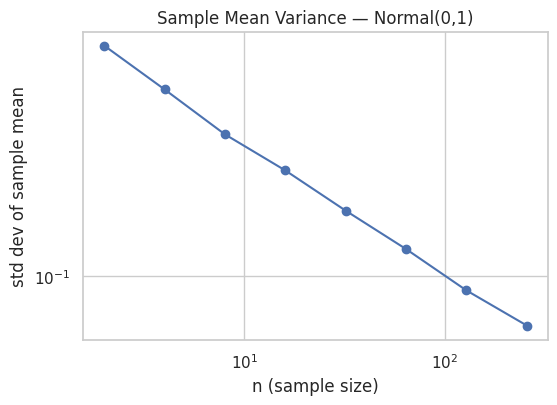

[np.float64(0.7293005662355526),
 np.float64(0.49983899182541247),
 np.float64(0.3392356291092242),
 np.float64(0.2485249797665914),
 np.float64(0.17567296611154434),
 np.float64(0.12616468273913212),
 np.float64(0.08831273316168813),
 np.float64(0.06524492358296374)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_mean_variance(dist_name="Normal(0,1)", n_values=None, num_repeats=1000):
    if n_values is None:
        n_values = [2, 4, 8, 16, 32, 64, 128, 256]

    std_devs = []

    for n in n_values:
        samples, _, _ = sample_distribution(dist_name, n * num_repeats)
        samples = samples.reshape((num_repeats, n))
        sample_means = samples.mean(axis=1)
        std_devs.append(np.std(sample_means))

    plt.figure(figsize=(6, 4))
    plt.plot(n_values, std_devs, marker='o')
    plt.xlabel("n (sample size)")
    plt.ylabel("std dev of sample mean")
    plt.title(f"Sample Mean Variance — {dist_name}")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True)
    plt.show()

    return std_devs

plot_sample_mean_variance("Normal(0,1)")

1. What is the slope of the log-log plot? (Hint: It's related to the exponent in \( \sigma^2 / n \).)
2. Try switching to `Exponential(λ=1)` — how does the variance shrink compare to Normal?
3. What happens if you try `Pareto(α=1.5)`? Can you explain the behavior?

# Central Limit Theorem (CLT)

Let \( X_1, X_2, ..., X_n \) be i.i.d. random variables with mean μ and finite variance σ².

The Central Limit Theorem says:

\[
\frac{1}{\sqrt{n}} \sum_{i=1}^n (X_i - \mu) \xrightarrow{d} \mathcal{N}(0, \sigma^2)
\]

Or equivalently, the sample mean approaches a Normal distribution:

\[
\bar{X}_n \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)
\]

**Key points:**
- The original distribution doesn’t have to be Normal.
- Convergence gets better as n increases.
- This explains why Normal models work surprisingly often in practice.


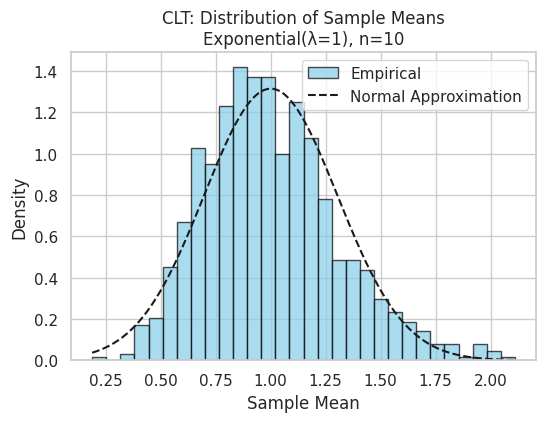

In [ ]:
def clt_histogram_demo(dist_name="Exponential(λ=1)", n=10, num_experiments=1000):
    """
    Plot histogram of sample means from repeated experiments.
    Overlays the Normal distribution N(mean, var/n).
    """
    # Generate multiple samples of size n
    samples, true_mean, _ = sample_distribution(dist_name, n * num_experiments)
    samples = samples.reshape((num_experiments, n))
    sample_means = samples.mean(axis=1)

    plt.figure(figsize=(6, 4))
    plt.hist(sample_means, bins=30, density=True, color="skyblue", edgecolor="black", alpha=0.7, label="Empirical")

    # Overlay the normal approximation
    if np.isfinite(true_mean):
        sample_std = np.std(sample_means)
        x = np.linspace(min(sample_means), max(sample_means), 200)
        pdf = (1 / (sample_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - np.mean(sample_means)) / sample_std)**2)
        plt.plot(x, pdf, 'k--', label="Normal Approximation")

    plt.title(f"CLT: Distribution of Sample Means\n{dist_name}, n={n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

clt_histogram_demo("Exponential(λ=1)", n=10, num_experiments=1000)

### Visualization

In [ ]:
interact(
    clt_histogram_demo,
    dist_name=Dropdown(options=available_distributions, value="Exponential(λ=1)", description="Distribution"),
    n=IntSlider(value=10, min=2, max=500, step=1, description="Sample size n"),
    num_experiments=IntSlider(value=1000, min=100, max=5000, step=100, description="# Experiments"),
);

interactive(children=(Dropdown(description='Distribution', index=2, options=('Bernoulli(p=0.5)', 'Uniform(0,1)…

# Applications of CLT in ML: Estimating Accuracy and Building Confidence Intervals



When evaluating ML models (e.g. accuracy, precision), we usually test on a finite sample. That sample mean is **just an estimate**.

Using CLT, we can quantify **how uncertain** our estimate is, by constructing confidence intervals:

\[
\text{CI} = \bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}
\]

Where:
- \( \bar{x} \): sample mean (e.g., accuracy)
- \( s \): sample std dev
- \( n \): number of test points (or batches)
- \( z_{\alpha/2} \): critical value (e.g., 1.96 for 95% confidence)

In [ ]:
from scipy.stats import norm

def compute_confidence_interval(sample, alpha=0.05):
    mean = np.mean(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(len(sample))
    z_score = norm.ppf(1 - alpha/2)
    ci_lower = mean - z_score * std_err
    ci_upper = mean + z_score * std_err
    return mean, (ci_lower, ci_upper)

# Simulate ML accuracy measurements from cross-validation or multiple runs
np.random.seed(1)
simulated_accs = np.random.beta(8, 2, size=30)  # e.g. accuracy ~ Beta(8,2)

mean_acc, ci = compute_confidence_interval(simulated_accs)
print(f"Estimated accuracy: {mean_acc:.3f}")
print(f"95% CI: ({ci[0]:.3f}, {ci[1]:.3f})")

Estimated accuracy: 0.824
95% CI: (0.785, 0.863)


1. Replace `simulated_accs` with accuracies from multiple model runs on different seeds.
2. What happens to the CI width as you increase the number of runs to 50 or 100?
3. Try simulating AUC scores instead of accuracy. Use `np.random.normal(0.85, 0.02, size=30)` as a proxy.


# Bootstrapping: Estimating Uncertainty Without CLT


What if:
- You don’t know the underlying distribution?
- You’re worried the sample size is too small for CLT?
- You just want a plug-and-play way to estimate variability?

 **Bootstrap to the rescue.**

Bootstrap resamples **with replacement** from your original sample, generating "fake datasets" that mimic the sampling distribution of your statistic — like accuracy or median.

We then compute the statistic (e.g., sample mean) across all resamples and use the spread to construct a confidence interval.

This makes **no distributional assumptions**, so it's super flexible.

In [ ]:
def bootstrap_ci(data, stat_fn=np.mean, num_resamples=1000, alpha=0.05):
    """
    Compute bootstrap CI for any statistic (mean, median, etc.).
    """
    n = len(data)
    stats = []
    for _ in range(num_resamples):
        resample = np.random.choice(data, size=n, replace=True)
        stats.append(stat_fn(resample))
    lower = np.percentile(stats, 100 * alpha / 2)
    upper = np.percentile(stats, 100 * (1 - alpha / 2))
    return np.mean(stats), (lower, upper)

# Example: Simulated model accuracy measurements
np.random.seed(42)
simulated_accs = np.random.beta(8, 2, size=30)

mean_boot, (ci_lower, ci_upper) = bootstrap_ci(simulated_accs)
print(f"Bootstrap CI for accuracy: ({ci_lower:.3f}, {ci_upper:.3f})")

Bootstrap CI for accuracy: (0.775, 0.836)


### Visualization

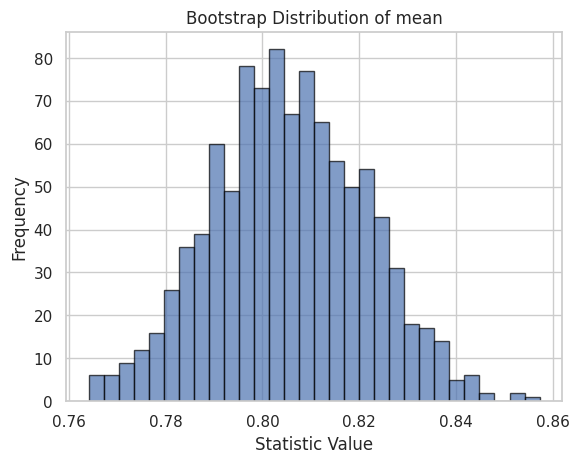

In [ ]:
def plot_bootstrap_distribution(data, stat_fn=np.mean, num_resamples=1000):
    n = len(data)
    stats = [stat_fn(np.random.choice(data, size=n, replace=True)) for _ in range(num_resamples)]
    plt.hist(stats, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Bootstrap Distribution of {stat_fn.__name__}")
    plt.xlabel("Statistic Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_bootstrap_distribution(simulated_accs)

1. Change `stat_fn` to `np.median` — does the bootstrap CI look symmetric?
2. Try bootstrapping on a small skewed sample, like `np.random.exponential(scale=1, size=10)`.
3. Compare bootstrap CI to the CLT-based CI from earlier. When do they differ most?


#Sum & Product Rule

These rules are the foundation of reasoning under uncertainty.

## Sum Rule (Marginalization)
Given a joint probability distribution over two discrete variables A and B:

  **P(A) = Σ₍ᵦ₎ P(A, B = b)**

This "sums out" B to get the marginal probability of A.

## Product Rule (Chain Rule)
To express a joint probability using conditionals:

  **P(A, B) = P(A | B) · P(B)**  
  or equivalently  
  **P(A, B) = P(B | A) · P(A)**

Together, these rules allow you to move between joint, marginal, and conditional probabilities.


In [ ]:
import pandas as pd

# A joint probability table of Weather and Mood
joint_table = pd.DataFrame({
    'Sunny':    [0.2, 0.3],
    'Rainy':    [0.1, 0.4]
}, index=['Happy', 'Sad'])

joint_table.index.name = 'Mood'
joint_table.columns.name = 'Weather'

# Display the joint distribution
display(joint_table)

# Sum rule: marginal over mood
print("Marginal P(Mood):")
print(joint_table.sum(axis=1))

# Sum rule: marginal over weather
print("\nMarginal P(Weather):")
print(joint_table.sum(axis=0))

# Product rule: P(Mood | Weather = Rainy)
p_weather_rainy = joint_table['Rainy'].sum()
conditional = joint_table['Rainy'] / p_weather_rainy

print("\nP(Mood | Weather = Rainy):")
print(conditional)

Weather,Sunny,Rainy
Mood,,
Happy,0.2,0.1
Sad,0.3,0.4


Marginal P(Mood):
Mood
Happy    0.3
Sad      0.7
dtype: float64

Marginal P(Weather):
Weather
Sunny    0.5
Rainy    0.5
dtype: float64

P(Mood | Weather = Rainy):
Mood
Happy    0.2
Sad      0.8
Name: Rainy, dtype: float64


1. Use the joint table to compute P(Weather = Sunny | Mood = Happy).
2. Verify the sum of all joint probabilities is 1.
3. What is P(Happy) according to the marginal distribution?
4. Bonus: Confirm that P(Happy) = P(Happy, Sunny) + P(Happy, Rainy).


## ML connection
In Naive Bayes and other ML models, we constantly use these rules:
- To compute **likelihoods** from features (via chain rule)
- To infer **posteriors** (via Bayes' Rule, which builds on the product rule)

These two rules are the algebra of probability inference.


##Demo — Law of Large Numbers

Watch how the empirical proportion of heads converges to 0.5 as n increases.

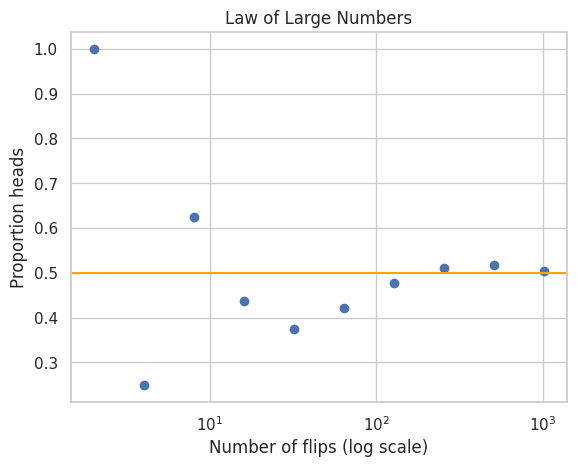

In [ ]:
ns = np.array([2,4,8,16,32,64,128,256,512,1024])
heads = [np.random.binomial(n,0.5) for n in ns]
prop = np.array(heads)/ns

plt.scatter(ns, prop)
plt.axhline(0.5, color='orange')
plt.xscale('log')
plt.xlabel("Number of flips (log scale)")
plt.ylabel("Proportion heads")
plt.title("Law of Large Numbers")
plt.show()

# Bayes' Rule: Reasoning Backwards



Suppose we observe an effect (e.g., a symptom), and want to infer its cause (e.g., a disease). Bayes' Rule lets us "flip" conditional probabilities:

### Bayes' Theorem:
  **P(A | B) = [P(B | A) · P(A)] / P(B)**

Where:
- P(A) is the **prior**
- P(B | A) is the **likelihood**
- P(B) is the **evidence** (normalization)
- P(A | B) is the **posterior**

This rule is used throughout statistics and machine learning — from medical diagnosis to spam filters.

In [ ]:
# Example: Disease diagnosis
p_disease = 0.01          # Prior: 1% of people have the disease
p_pos_given_disease = 0.99  # Likelihood: test detects disease correctly
p_pos_given_no_disease = 0.05  # False positive rate

# Use total probability to compute P(Positive)
p_positive = (
    p_pos_given_disease * p_disease +
    p_pos_given_no_disease * (1 - p_disease)
)

# Apply Bayes' Rule
p_disease_given_pos = (p_pos_given_disease * p_disease) / p_positive
print(f"P(Disease | Positive test) = {p_disease_given_pos:.3f}")

P(Disease | Positive test) = 0.167


1. Increase the base rate of the disease to 10%. What happens to P(Disease | Positive)?
2. What if the test were perfect (no false positives)? Try setting `p_pos_given_no_disease = 0`.
3. Try setting a very rare disease (e.g., 0.001 prior) — what's the effect on P(Disease | Positive)?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Toy dataset: spam vs ham messages
texts = ["win a free iphone", "click to claim your prize", "meet me at noon", "can you send the file", "free money now"]
labels = ["spam", "spam", "ham", "ham", "spam"]

# Convert text to bag-of-words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Train Naive Bayes
model = MultinomialNB()
model.fit(X, labels)

# Predict on new message
test_msg = ["free prize now"]
X_test = vectorizer.transform(test_msg)
pred = model.predict(X_test)

print(f"Prediction for '{test_msg[0]}': {pred[0]}")

Prediction for 'free prize now': spam


##Naive Bayes assumes:
- Features are conditionally independent given the class.
- Uses product rule to estimate: P(word1, word2, ... | class)

Then applies Bayes' Rule to compute P(class | words).  
Despite its simplicity, it's surprisingly effective for text classification.

##Demo — Binomial PMF

Visualizing a simple discrete likelihood.

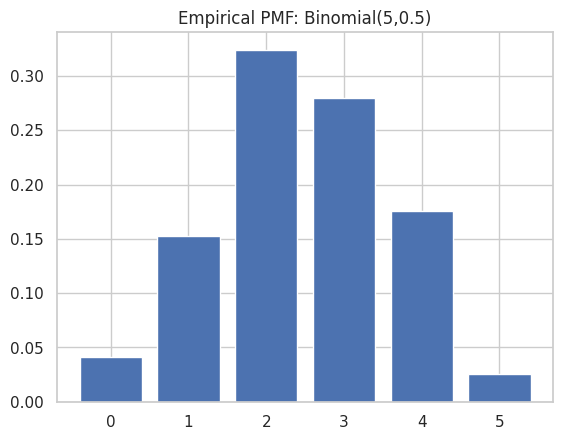

In [ ]:
K = np.random.binomial(5,0.5,1000)
vals, counts = np.unique(K, return_counts=True)
pmf = counts/counts.sum()

plt.bar(vals, pmf)
plt.title("Empirical PMF: Binomial(5,0.5)")
plt.show()

#Binomial Distribution and Likelihood


Binomial Distribution

The **Binomial Distribution** models the number of successes in `n` independent yes/no trials, each with success probability `p`.

Probability Mass Function (PMF):
\[
P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}
\]

Where:
- `n` = number of trials
- `k` = number of observed successes
- `p` = probability of success on a single trial

Binomial distributions arise in:
- Modeling coin flips
- Classification accuracy (number of correct predictions)
- Bootstrapping counts

Think of `X ∼ Bin(n, p)` as counting how often something happens over `n` tries.


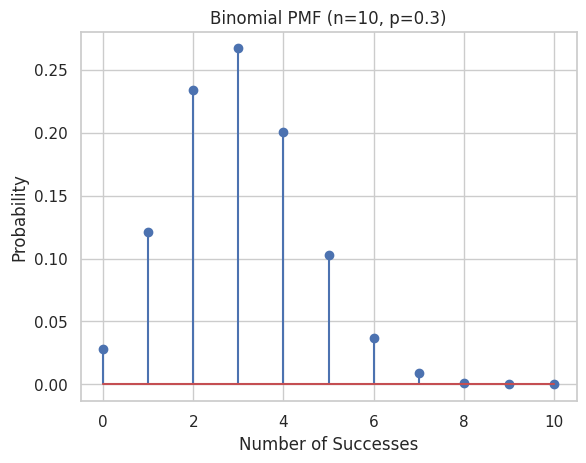

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10      # number of trials
p = 0.3     # probability of success

x = np.arange(0, n + 1)
pmf = binom.pmf(x, n, p)

plt.stem(x, pmf)
plt.title(f"Binomial PMF (n={n}, p={p})")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

1. Change `p` to 0.5 and 0.8. How does the shape of the distribution change?
2. Try larger `n`, like 30 or 100. What happens to the shape?
3. Bonus: For large `n`, try plotting a normal curve over the histogram — does it match?


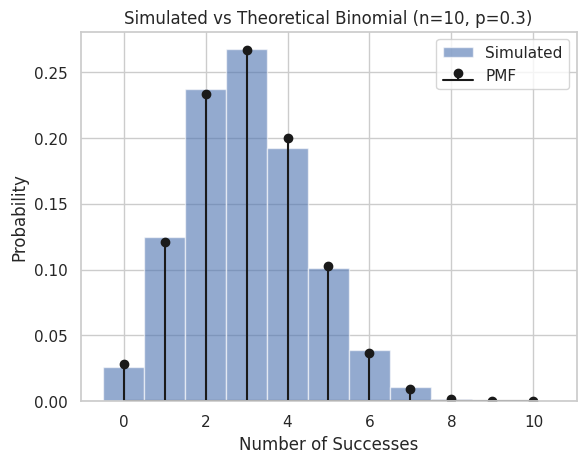

In [ ]:
simulated = np.random.binomial(n=n, p=p, size=10000)

plt.hist(simulated, bins=np.arange(n+2)-0.5, density=True, alpha=0.6, label='Simulated')
plt.stem(x, pmf, linefmt='k-', markerfmt='ko', basefmt='k-', label='PMF')
plt.title("Simulated vs Theoretical Binomial (n=10, p=0.3)")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

Binomial models appear in:
- **Cross-entropy loss** for classification (log-likelihood of binomial draws)
- **Accuracy modeling** (e.g., number of correctly classified points out of `n`)
- **A/B testing** (success/failure outcomes across experiments)

Later, logistic regression and other models will model *p* directly from features — but it's the binomial underneath.

##Empirical Mean & Covariance of 2D Gaussian

Compare your empirical results to the true values.

In [ ]:
mean = np.array([1,2])
cov = np.array([[2,1.5],[1.5,3]])

# TODO:
# Xg = np.random.multivariate_normal(mean, cov, 2000)
# emp_mean = ...
# emp_cov = ...
# print(emp_mean, emp_cov)

# plt.scatter(Xg[:,0], Xg[:,1], alpha=0.3)
# plt.axis("equal")
# plt.show()

##Demo — Expected Value from Empirical PMF

In [ ]:
P = np.random.binomial(5,0.5,10000)
vals,counts = np.unique(P,return_counts=True)
E = (vals * (counts/counts.sum())).sum()
print("Estimated E[X]:", E)

Estimated E[X]: 2.5073


##Demo — Boxplot Visualization

Shows distribution and outliers quickly.

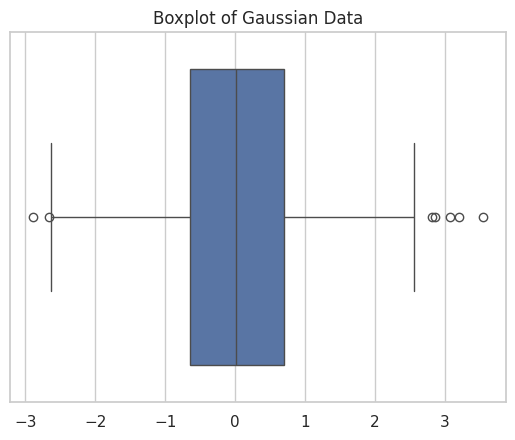

In [ ]:
x = np.random.normal(size=1000)
sns.boxplot(x=x)
plt.title("Boxplot of Gaussian Data")
plt.show()

##Demo — Covariance & Correlation with Iris

A real dataset example.

Covariance:
 [[0.68569351 1.27431544]
 [1.27431544 3.11627785]]
Correlation:
 [[1.         0.87175378]
 [0.87175378 1.        ]]


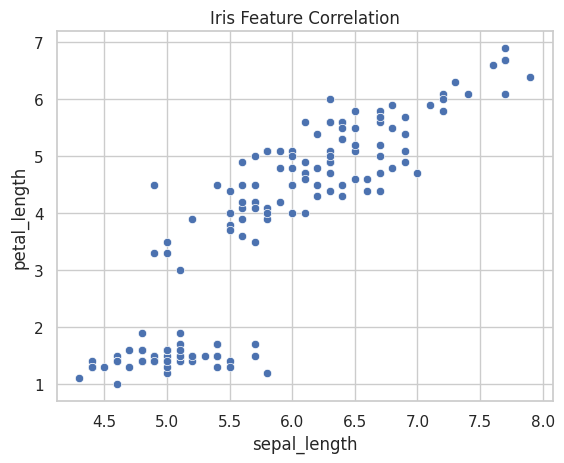

In [ ]:
iris = sns.load_dataset("iris")
x1 = iris.sepal_length
x2 = iris.petal_length

print("Covariance:\n", np.cov(x1,x2))
print("Correlation:\n", np.corrcoef(x1,x2))

sns.scatterplot(x=x1, y=x2)
plt.title("Iris Feature Correlation")
plt.show()

#Expectation, Variance, Covariance



These are the workhorses of probability and statistics.

- **Expectation** is the long-run average:
  E[X] = ∑x P(x) for discrete, or ∫x f(x) dx for continuous

- **Variance** measures spread:
  Var(X) = E[(X - E[X])²]

- **Covariance** measures joint variability:
  Cov(X, Y) = E[(X - E[X]) · (Y - E[Y])]

If Cov(X, Y) > 0: they increase together  
If Cov(X, Y) < 0: they move in opposite directions  
If Cov(X, Y) = 0: they’re uncorrelated — but not necessarily independent!

In [ ]:
np.random.seed(1)
X = np.random.normal(loc=3, scale=2, size=1000)  # simulate X ~ N(3, 2^2)

# Empirical mean and variance
mean_X = np.mean(X)
var_X = np.var(X, ddof=1)

print(f"E[X] ≈ {mean_X:.2f}")
print(f"Var(X) ≈ {var_X:.2f}")

E[X] ≈ 3.08
Var(X) ≈ 3.85


In [ ]:
Y = 2 * X + np.random.normal(0, 2, size=len(X))  # Y is strongly dependent on X

cov_matrix = np.cov(X, Y)
cov_XY = cov_matrix[0, 1]

print(f"Cov(X, Y) ≈ {cov_XY:.2f}")

Cov(X, Y) ≈ 7.80


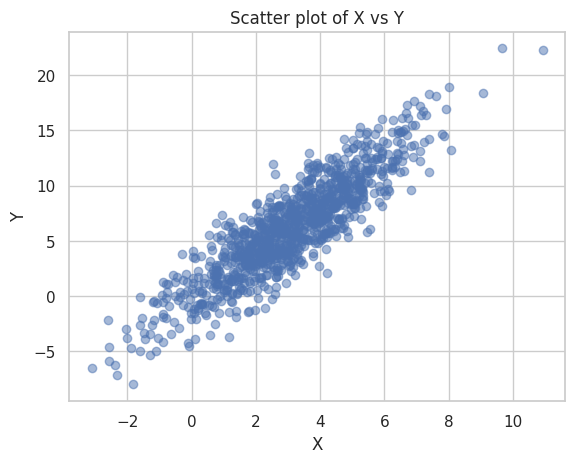

In [ ]:
plt.scatter(X, Y, alpha=0.5)
plt.title("Scatter plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

1. Replace `Y = 2 * X + noise` with `Y = np.random.normal(0, 1, len(X))`. What happens to Cov(X, Y)?
2. Plot histograms of X and Y to compare their marginal distributions.
3. Use `np.corrcoef(X, Y)` to compute the Pearson correlation coefficient — how does it relate to covariance?

- In **linear regression**, we rely on covariance to learn weights: larger covariance means stronger linear relationship.
- In **PCA**, we decompose the **covariance matrix** to find directions of greatest variance.
- In **feature selection**, we often drop features that are highly correlated (i.e., high covariance).

# Covariance ≠ Independence


A common misconception is that:
  **Cov(X, Y) = 0 ⇒ X and Y are independent.**

This is **false**.

Covariance only captures *linear* relationships. Two variables can be dependent in a nonlinear way and still have zero covariance.

### Classic Example:
Let:
- X ∼ Uniform(-1, 1)
- Y = X²

Clearly, Y depends on X. But:
- E[X] = 0
- E[Y] = E[X²]
- Cov(X, Y) = E[X · X²] - E[X]E[X²] = E[X³] - 0 = 0

So Cov(X, Y) = 0 despite clear dependence.


Cov(X, Y) ≈ -0.00143


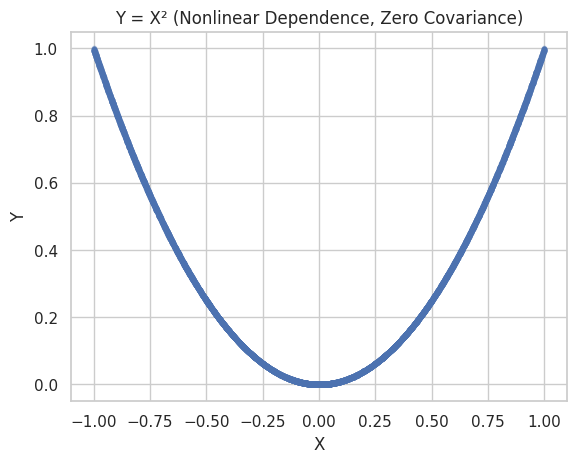

In [ ]:
np.random.seed(2)
X = np.random.uniform(-1, 1, 10000)
Y = X ** 2

cov_xy = np.cov(X, Y)[0, 1]
print(f"Cov(X, Y) ≈ {cov_xy:.5f}")

plt.scatter(X, Y, alpha=0.3, s=10)
plt.title("Y = X² (Nonlinear Dependence, Zero Covariance)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

1. Try Y = sin(πX). Is covariance still zero? Is there dependence?
2. Try Y = X³. What happens to Cov(X, Y)? Why?
3. Try plotting (X, Y) for other nonlinear transforms — what does dependence "look" like?

- Many ML models assume **uncorrelated** or **independent** features. This demo shows uncorrelated ≠ independent.
- Understanding this helps when dealing with nonlinear models — dependencies may not show up in correlation matrices.
- Covariance-based tools (e.g. PCA) miss nonlinear structures — this motivates using nonlinear dimensionality reduction (e.g. t-SNE, kernel PCA).


# Linear Transformations of Random Vectors



Suppose:
- \( X \) is a random vector (e.g. features)
- \( A \) is a matrix (e.g. transformation, rotation, projection)
- \( b \) is a constant offset (bias)

Then:  
\[
Y = AX + b
\]
is a new random vector, linearly transformed.

---

This is *exactly* what happens in:
- **Neural networks**: each layer is a linear map \( AX + b \), followed by nonlinearity
- **PCA**: projecting \( X \) onto top eigenvectors
- **Whitening**, **standardization**, **dimensionality reduction**


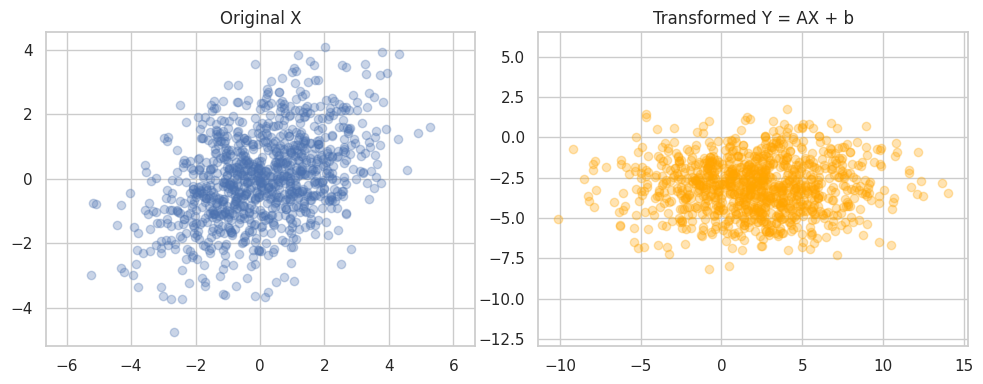

In [ ]:
np.random.seed(0)

# Original random vector X ∈ R^2
X = np.random.multivariate_normal(mean=[0, 0], cov=[[3, 1], [1, 2]], size=1000)
A = np.array([[1, 2], [-1, 1]])
b = np.array([2, -3])

# Apply transformation
Y = X @ A.T + b

# Plot X and Y
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(X[:, 0], X[:, 1], alpha=0.3)
ax[0].set_title("Original X")
ax[0].axis("equal")

ax[1].scatter(Y[:, 0], Y[:, 1], alpha=0.3, color='orange')
ax[1].set_title("Transformed Y = AX + b")
ax[1].axis("equal")

plt.tight_layout()
plt.show()

1. Change `A` to different rotation or scaling matrices — how does the shape change?
2. Set `b = [0, 0]` and compare — what’s the role of the bias?
3. Compute the mean of X and Y — confirm that:
  E[Y] = A·E[X] + b
4. Bonus: Try `np.cov(X.T)` and `np.cov(Y.T)` to observe how transformation affects spread.


# Principal Component Analysis (PCA)




PCA is a linear method for:
- **Dimensionality reduction**
- **Noise filtering**
- **Latent structure discovery**

It finds the directions ("components") of **maximum variance** in your data.

PCA works by:
1. Centering the data
2. Computing the **covariance matrix**
3. Taking its **eigenvectors**
4. Projecting the data onto top-k eigenvectors (i.e., doing a linear transformation)

This is exactly the type of operation we’ve been building toward:
  Y = A·X

Now, let’s implement PCA *step-by-step* from scratch.

Generate Data

/tmp/ipython-input-2916387905.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 600)


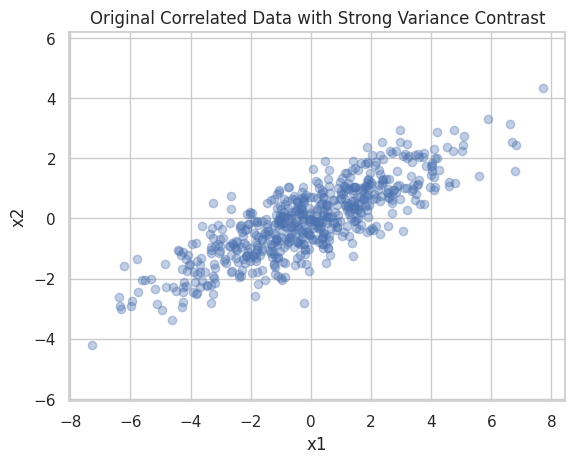

In [ ]:
np.random.seed(42)

# Strong separation between variances
mean = [0, 0]
cov = [[6, 3],    # high variance along a tilted direction
       [3, 1]]    # low variance orthogonal to it

X = np.random.multivariate_normal(mean, cov, 600)

plt.scatter(X[:, 0], X[:, 1], alpha=0.35)
plt.title("Original Correlated Data with Strong Variance Contrast")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid(True)
plt.show()

Center the Data

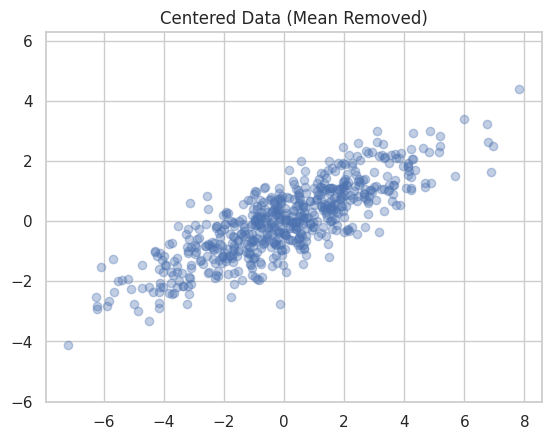

In [ ]:
X_centered = X - np.mean(X, axis=0)

plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.35)
plt.title("Centered Data (Mean Removed)")
plt.axis("equal")
plt.grid(True)
plt.show()


PCA is based on the covariance matrix:
\[
\Sigma = E[(X - \mu)(X - \mu)^T]
\]

If you don’t subtract the mean, the PCA directions get skewed by the shift.


In [ ]:
cov_matrix = np.cov(X_centered.T)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[5.80477322 2.46478717]
 [2.46478717 1.5390156 ]]


In [ ]:
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Sort in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Eigenvalues:", eigvals)
print("\nEigenvectors (columns):\n", eigvecs)

Eigenvalues: [6.93139557 0.41239325]

Eigenvectors (columns):
 [[-0.90949366  0.41571779]
 [-0.41571779 -0.90949366]]


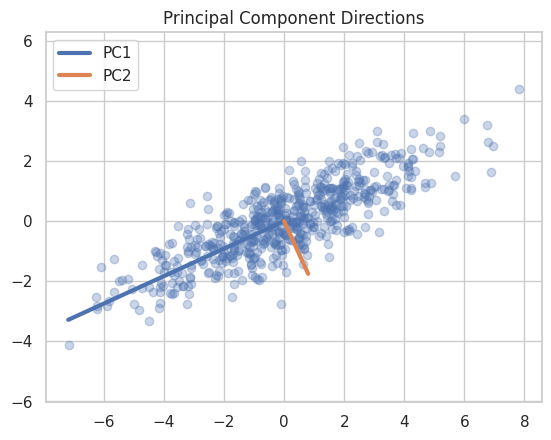

In [ ]:
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3)

origin = np.array([0, 0])

for i in range(2):
    direction = eigvecs[:, i] * np.sqrt(eigvals[i]) * 3
    plt.plot([origin[0], direction[0]],
             [origin[1], direction[1]],
             linewidth=3, label=f"PC{i+1}")

plt.legend()
plt.title("Principal Component Directions")
plt.axis("equal")
plt.grid(True)
plt.show()

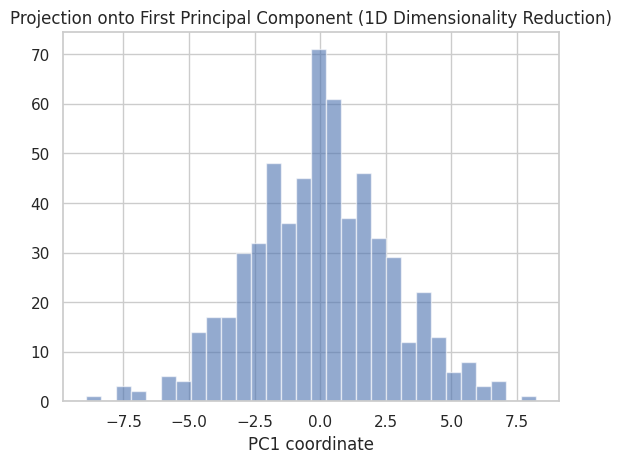

In [ ]:
Z = X_centered @ eigvecs[:, 0]

plt.hist(Z, bins=30, alpha=0.6)
plt.title("Projection onto First Principal Component (1D Dimensionality Reduction)")
plt.xlabel("PC1 coordinate")
plt.grid(True)
plt.show()

- PC1 captures the long axis of the elliptical cloud.
- PC2 captures the short axis (small variance).
- PCA finds the directions where data varies the most — not the “best” direction for clustering or classification, but for summarizing variation.

This is why PCA is used for:
- Feature compression
- Noise reduction
- Visualization
- Latent structure discovery

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_centered)

print("sklearn eigenvalues:", pca.explained_variance_)
print("sklearn components:\n", pca.components_)

sklearn eigenvalues: [6.93139557 0.41239325]
sklearn components:
 [[ 0.90949366  0.41571779]
 [-0.41571779  0.90949366]]


1. Replace the covariance with one that has NO correlation (diagonal).  
   Does PCA still rotate the data?

2. Set covariance to:
       [[10, 0],
        [ 0, 1]]
   What shape does the data cloud have? How does PCA behave?

3. Plot the reconstruction error when using only PC1:
   - X_hat = (Z[:,None] @ eigvecs[:,0:1].T)
   - Compare X_hat to X_centered visually.

4. Try projecting onto PC2 instead — what does the distribution look like?